<a href="https://colab.research.google.com/github/seeun7/C-programming-1/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

202310954 이세은 인공지능 HW4

라이브러리 import, 데이터 크기, 초기 가중치 설정 (random)

In [47]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

N, D_in, H, D_out = 64, 1000, 100, 10
x, y = randn(N, D_in), randn(N, D_out)
w1, w2 = randn(D_in, H), randn(H, D_out)

Gradient Descent(GD) (바닐라)

In [48]:
def gradient_descent(x, y, w1, w2, epochs=20, lr=1e-4):
    losses = []
    for epoch in range(epochs):
        h = 1 / (1 + np.exp(-x.dot(w1)))
        y_pred = h.dot(w2)
        loss = np.square(y_pred - y).sum()
        losses.append(loss)
        grad_y_pred = 2.0 * (y_pred - y)
        grad_w2 = h.T.dot(grad_y_pred)
        grad_h = grad_y_pred.dot(w2.T)
        grad_w1 = x.T.dot(grad_h * h * (1 - h))

        w1 -= lr * grad_w1
        w2 -= lr * grad_w2
    return losses

# 초기 가중치
w1_gd, w2_gd = randn(D_in, H), randn(H, D_out)
loss_gd = gradient_descent(x, y, w1_gd, w2_gd)

Stochastic Gradient Descent (SGD)

In [49]:
def sgd(x, y, w1, w2, batch_size, epochs=20, lr=1e-4):
    losses = []
    N = x.shape[0]

    for epoch in range(epochs):
        permutation = np.random.permutation(N)
        x_shuffled = x[permutation]
        y_shuffled = y[permutation]

        for i in range(0, N, batch_size):
            x_batch = x_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            h = 1 / (1 + np.exp(-x_batch.dot(w1)))
            y_pred = h.dot(w2)

            loss = np.square(y_pred - y_batch).sum()

            grad_y_pred = 2.0 * (y_pred - y_batch)
            grad_w2 = h.T.dot(grad_y_pred)
            grad_h = grad_y_pred.dot(w2.T)
            grad_w1 = x_batch.T.dot(grad_h * h * (1 - h))

            w1 -= lr * grad_w1
            w2 -= lr * grad_w2

        h = 1 / (1 + np.exp(-x.dot(w1)))
        y_pred = h.dot(w2)
        loss = np.square(y_pred - y).sum()
        losses.append(loss)

    return losses

배치 사이즈, 초기 가중치 설정

In [50]:
batch_sizes = [100, 200, 1000]
loss_histories_sgd = {}

for batch_size in batch_sizes:
    w1_sgd, w2_sgd = randn(D_in, H), randn(H, D_out)
    loss_history_sgd = sgd(x, y, w1_sgd, w2_sgd, batch_size)
    loss_histories_sgd[batch_size] = loss_history_sgd

배치 사이즈에 따른 비교 그래프

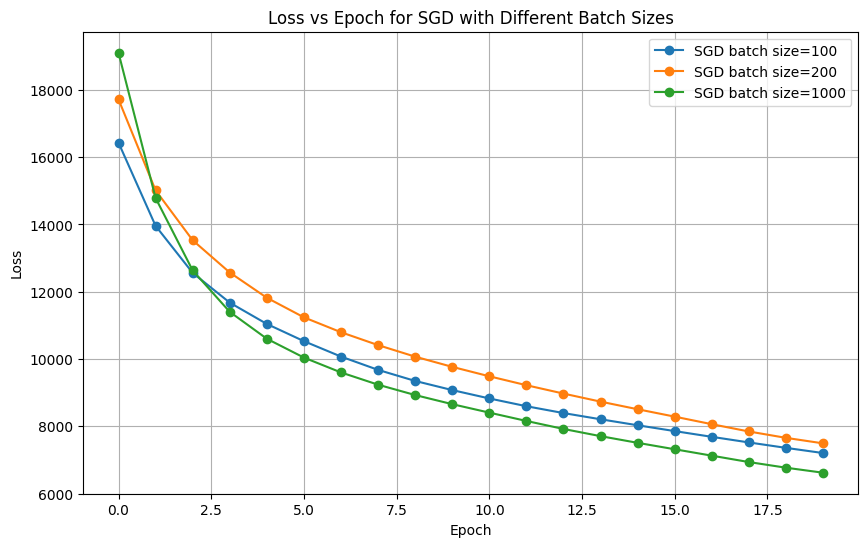

In [51]:
plt.figure(figsize=(10, 6))

for batch_size in batch_sizes:
    plt.plot(loss_histories_sgd[batch_size], label=f'SGD batch size={batch_size}', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch for SGD with Different Batch Sizes')
plt.legend()
plt.grid(True)
plt.show()

**GD(gradient Descent)**: 전체 데이터셋을 사용하여 매 epoch마다 loss 계산 및 가중치 업데이트.
데이터셋 전체에 대한 손실 함수의 평균 기울기를 계산.
전체 데이터셋을 사용하므로 loss function의 변동이 적음
그러나 데이터셋의 크기가 클 경우 계산 시간이 오래 걸림(expensive) & 메모리 사용량이 많은 편임

**SGD(Stochastic Gradient Descent)**: 데이터셋을 작게 나누어(미니배치로) 각 배치에 대한 loss function의 기울기를 계산하고 가중치 업데이트.
각 배치에 대해서만 연산하기 때문에 업데이트가 빠르고 메모리 사용량이 적음.
그러나 각 배치마다 가중치가 업데이트 되어 loss function의 변동성이 커 이를 위해 learning rate 조절이 필요하기도 함

GD vs SGD 비교그래프

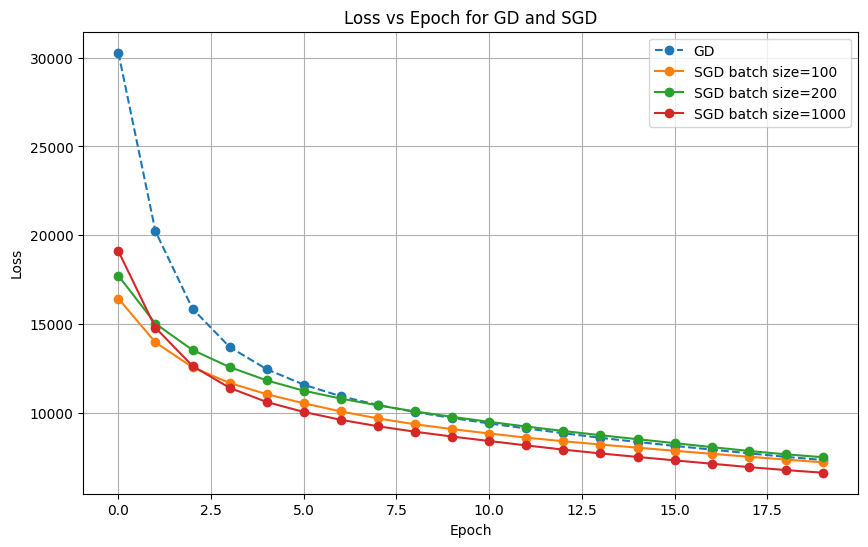

In [52]:
# 그래프 작성
plt.figure(figsize=(10, 6))
plt.plot(loss_gd, label='GD', linestyle='--', marker='o')

for batch_size in batch_sizes:
    plt.plot(loss_histories_sgd[batch_size], label=f'SGD batch size={batch_size}', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch for GD and SGD')
plt.legend()
plt.grid(True)
plt.show()


학습률, 배치 사이즈를 조정하여 가장 좋은 하이퍼파라미터셋 결정하기

여러 경우의 수(하이퍼파라미터셋)를 시각적으로 나타낸 그래프에서 수렴 속도와 최종 loss값, 변동성을 고려하여 가장 효율적인 하이퍼파라미터셋을 결정하고자 했을 때 위 그래프에서는 learning rate 0.0001, batch size 100을 선택할 수 있다.
바닐라 코드(GD)와 비교했을 때 훨씬 낮은 loss값을 도출한다.

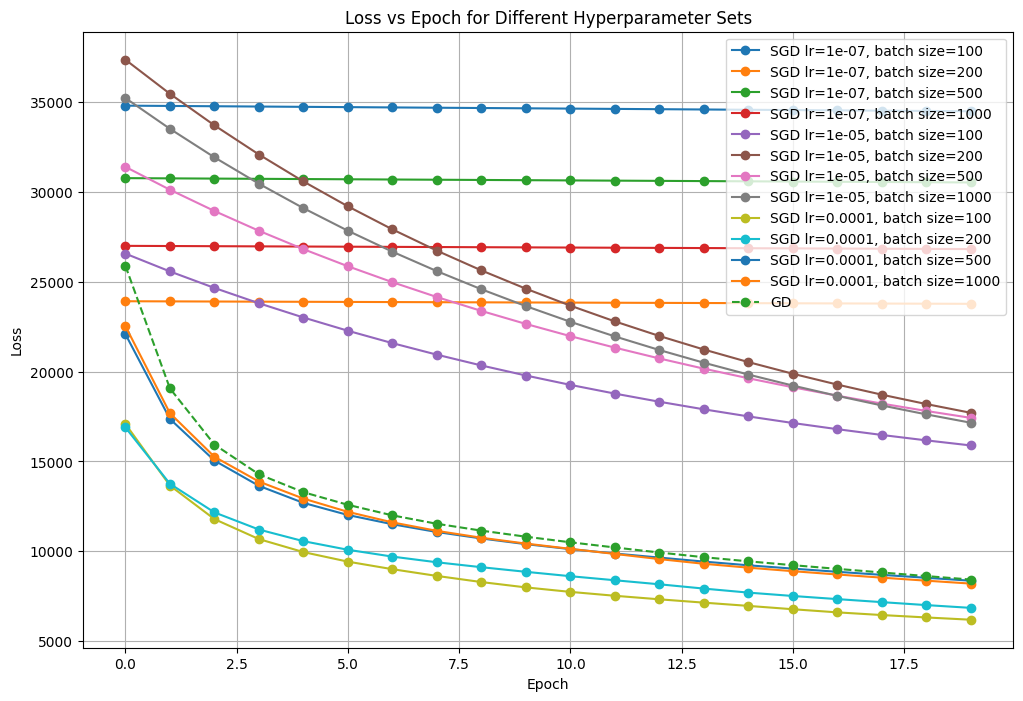

In [62]:
# 하이퍼파라미터
learning_rates = [1e-7, 1e-5, 1e-4]
batch_sizes = [100, 200, 500, 1000]
epochs = 20

# 그래프 작성
plt.figure(figsize=(12, 8))

for lr in learning_rates:
    for batch_size in batch_sizes:
        # SGD 실행
        w1_sgd, w2_sgd = randn(D_in, H), randn(H, D_out)
        loss_history_sgd = sgd(x, y, w1_sgd, w2_sgd, batch_size, epochs=epochs, lr=lr)

        # 그래프 그리기
        label = f'SGD lr={lr}, batch size={batch_size}'
        plt.plot(loss_history_sgd, label=label, marker='o')

# Vanilla 코드 실행
w1_gd, w2_gd = randn(D_in, H), randn(H, D_out)
loss_history_gd = gradient_descent(x, y, w1_gd, w2_gd, epochs=epochs)

# Vanilla 코드 그래프 그리기
plt.plot(loss_history_gd, label='GD', linestyle='--', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch for Different Hyperparameter Sets')
plt.legend()
plt.grid(True)
plt.show()
